<a href="https://colab.research.google.com/github/renalditri/textminingJoeBidenInstagram/blob/main/datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None) 

full_df = pd.read_csv("https://raw.githubusercontent.com/Trian24/textminingJoeBidenInstagram/main/labeled_comments.csv")
df = full_df.filter(['comment','label_sum'], axis=1)
df["comment"] = df["comment"].astype(str)
full_df.head()
df.head()

,comment,label_sum
0,Di amerika kotak suaranya dari kardus gak?,Netral
1,"""Ini adalah kecurangan besar di negara kita"", kalimat ini seperti ga asing ....",Negatif
2,Mungkinkah nanti trump menjadi mentri pertahanan AS. . .😁😁,Netral
3,"""ini adalah kecurangan dinegara Kita""... Familiar sekali dengan kata2 ini di setiap election, termasuk dinegara Kita 😂. Dan ini hanya di ucapkan oleh pihak yang kalah",Negatif
4,Jokowi-prabowo versi barat inimah🤣,Netral


In [ ]:
#Ubah text jadi lower case
df["text_lower"] = df["comment"].str.lower()
df.head()

,comment,label_sum,text_lower
0,Di amerika kotak suaranya dari kardus gak?,Netral,di amerika kotak suaranya dari kardus gak?
1,"""Ini adalah kecurangan besar di negara kita"", kalimat ini seperti ga asing ....",Negatif,"""ini adalah kecurangan besar di negara kita"", kalimat ini seperti ga asing ...."
2,Mungkinkah nanti trump menjadi mentri pertahanan AS. . .😁😁,Netral,mungkinkah nanti trump menjadi mentri pertahanan as. . .😁😁
3,"""ini adalah kecurangan dinegara Kita""... Familiar sekali dengan kata2 ini di setiap election, termasuk dinegara Kita 😂. Dan ini hanya di ucapkan oleh pihak yang kalah",Negatif,"""ini adalah kecurangan dinegara kita""... familiar sekali dengan kata2 ini di setiap election, termasuk dinegara kita 😂. dan ini hanya di ucapkan oleh pihak yang kalah"
4,Jokowi-prabowo versi barat inimah🤣,Netral,jokowi-prabowo versi barat inimah🤣


In [ ]:
#Hapus tanda baca
import string
table = str.maketrans(' ', ' ', string.punctuation)

lstt = []

for w in df["text_lower"]:
    lstt.append(w.translate(table))
print(lstt)
df["text_punct"] = pd.DataFrame(lstt)
df.head()

['di amerika kotak suaranya dari kardus gak', 'ini adalah kecurangan besar di negara kita kalimat ini seperti ga asing ', 'mungkinkah nanti trump menjadi mentri pertahanan as  😁😁', 'ini adalah kecurangan dinegara kita familiar sekali dengan kata2 ini di setiap election termasuk dinegara kita 😂 dan ini hanya di ucapkan oleh pihak yang kalah', 'jokowiprabowo versi barat inimah🤣', '77 tahun masih bisa berfikir cerdas dan jadi presiden🔥🔥 ❤️yang masih remaja disuruh emaknya nyari barang nyelip aja ngga ketemutemu', 'selamat buat joe biden terpilih jadi presiden amerika semoga amanah tidak mendiskriminasi ummat islam', 'gabakalan jadi presiden kalo ga ada restu dari para elite global 😅', 'as pemilu yang nungguin hasilnya satu dunia', 'pendukung trump bakal demo besar2an nih', 'joe biden terpilih menjadi presiden di amerika serikat letak keuntungan bagi negara indoesia apa atau merugikan', 'enak yg cara ngomongnya pada tegas pemimpin luar mah gk kya emmmmmmmm wkwkwkwk', 'siapapun yang menang 

,comment,label_sum,text_lower,text_punct
0,Di amerika kotak suaranya dari kardus gak?,Netral,di amerika kotak suaranya dari kardus gak?,di amerika kotak suaranya dari kardus gak
1,"""Ini adalah kecurangan besar di negara kita"", kalimat ini seperti ga asing ....",Negatif,"""ini adalah kecurangan besar di negara kita"", kalimat ini seperti ga asing ....",ini adalah kecurangan besar di negara kita kalimat ini seperti ga asing
2,Mungkinkah nanti trump menjadi mentri pertahanan AS. . .😁😁,Netral,mungkinkah nanti trump menjadi mentri pertahanan as. . .😁😁,mungkinkah nanti trump menjadi mentri pertahanan as 😁😁
3,"""ini adalah kecurangan dinegara Kita""... Familiar sekali dengan kata2 ini di setiap election, termasuk dinegara Kita 😂. Dan ini hanya di ucapkan oleh pihak yang kalah",Negatif,"""ini adalah kecurangan dinegara kita""... familiar sekali dengan kata2 ini di setiap election, termasuk dinegara kita 😂. dan ini hanya di ucapkan oleh pihak yang kalah",ini adalah kecurangan dinegara kita familiar sekali dengan kata2 ini di setiap election termasuk dinegara kita 😂 dan ini hanya di ucapkan oleh pihak yang kalah
4,Jokowi-prabowo versi barat inimah🤣,Netral,jokowi-prabowo versi barat inimah🤣,jokowiprabowo versi barat inimah🤣


In [ ]:
from collections import Counter
cnt = Counter()
for text in df["text_punct"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('di', 420),
 ('trump', 387),
 ('yg', 325),
 ('biden', 281),
 ('dan', 212),
 ('jadi', 189),
 ('yang', 188),
 ('ya', 184),
 ('ada', 164),
 ('amerika', 157)]

In [ ]:
#Ubah emoji menjadi teks
! pip3 install emoji
import emoji

lst = []

for w in df["text_punct"]:
    lst.append(emoji.demojize(w, delimiters=(" ", " ")))

df["text_emoji"] = pd.DataFrame(lst)
df.head()

,comment,label_sum,text_lower,text_punct,text_emoji
0,Di amerika kotak suaranya dari kardus gak?,Netral,di amerika kotak suaranya dari kardus gak?,di amerika kotak suaranya dari kardus gak,di amerika kotak suaranya dari kardus gak
1,"""Ini adalah kecurangan besar di negara kita"", kalimat ini seperti ga asing ....",Negatif,"""ini adalah kecurangan besar di negara kita"", kalimat ini seperti ga asing ....",ini adalah kecurangan besar di negara kita kalimat ini seperti ga asing,ini adalah kecurangan besar di negara kita kalimat ini seperti ga asing
2,Mungkinkah nanti trump menjadi mentri pertahanan AS. . .😁😁,Netral,mungkinkah nanti trump menjadi mentri pertahanan as. . .😁😁,mungkinkah nanti trump menjadi mentri pertahanan as 😁😁,mungkinkah nanti trump menjadi mentri pertahanan as beaming_face_with_smiling_eyes beaming_face_with_smiling_eyes
3,"""ini adalah kecurangan dinegara Kita""... Familiar sekali dengan kata2 ini di setiap election, termasuk dinegara Kita 😂. Dan ini hanya di ucapkan oleh pihak yang kalah",Negatif,"""ini adalah kecurangan dinegara kita""... familiar sekali dengan kata2 ini di setiap election, termasuk dinegara kita 😂. dan ini hanya di ucapkan oleh pihak yang kalah",ini adalah kecurangan dinegara kita familiar sekali dengan kata2 ini di setiap election termasuk dinegara kita 😂 dan ini hanya di ucapkan oleh pihak yang kalah,ini adalah kecurangan dinegara kita familiar sekali dengan kata2 ini di setiap election termasuk dinegara kita face_with_tears_of_joy dan ini hanya di ucapkan oleh pihak yang kalah
4,Jokowi-prabowo versi barat inimah🤣,Netral,jokowi-prabowo versi barat inimah🤣,jokowiprabowo versi barat inimah🤣,jokowiprabowo versi barat inimah rolling_on_the_floor_laughing


In [ ]:
#Hapus stop word
! pip3 install Sastrawi

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ['yg']
data = stop_factory + more_stopword
dictionary = ArrayDictionary(data)
str = StopWordRemover(dictionary)

lst2 = []
 
str.remove(text)
for w in df["text_emoji"]:
    lst2.append(str.remove(w))
 
df["text_stop"] = pd.DataFrame(lst2)
df.head()

,comment,label_sum,text_lower,text_punct,text_emoji,text_stop
0,Di amerika kotak suaranya dari kardus gak?,Netral,di amerika kotak suaranya dari kardus gak?,di amerika kotak suaranya dari kardus gak,di amerika kotak suaranya dari kardus gak,amerika kotak suaranya kardus gak
1,"""Ini adalah kecurangan besar di negara kita"", kalimat ini seperti ga asing ....",Negatif,"""ini adalah kecurangan besar di negara kita"", kalimat ini seperti ga asing ....",ini adalah kecurangan besar di negara kita kalimat ini seperti ga asing,ini adalah kecurangan besar di negara kita kalimat ini seperti ga asing,adalah kecurangan besar negara kalimat seperti ga asing
2,Mungkinkah nanti trump menjadi mentri pertahanan AS. . .😁😁,Netral,mungkinkah nanti trump menjadi mentri pertahanan as. . .😁😁,mungkinkah nanti trump menjadi mentri pertahanan as 😁😁,mungkinkah nanti trump menjadi mentri pertahanan as beaming_face_with_smiling_eyes beaming_face_with_smiling_eyes,mungkinkah trump menjadi mentri pertahanan as beaming_face_with_smiling_eyes beaming_face_with_smiling_eyes
3,"""ini adalah kecurangan dinegara Kita""... Familiar sekali dengan kata2 ini di setiap election, termasuk dinegara Kita 😂. Dan ini hanya di ucapkan oleh pihak yang kalah",Negatif,"""ini adalah kecurangan dinegara kita""... familiar sekali dengan kata2 ini di setiap election, termasuk dinegara kita 😂. dan ini hanya di ucapkan oleh pihak yang kalah",ini adalah kecurangan dinegara kita familiar sekali dengan kata2 ini di setiap election termasuk dinegara kita 😂 dan ini hanya di ucapkan oleh pihak yang kalah,ini adalah kecurangan dinegara kita familiar sekali dengan kata2 ini di setiap election termasuk dinegara kita face_with_tears_of_joy dan ini hanya di ucapkan oleh pihak yang kalah,adalah kecurangan dinegara familiar sekali kata2 di election termasuk dinegara face_with_tears_of_joy ini di ucapkan pihak kalah
4,Jokowi-prabowo versi barat inimah🤣,Netral,jokowi-prabowo versi barat inimah🤣,jokowiprabowo versi barat inimah🤣,jokowiprabowo versi barat inimah rolling_on_the_floor_laughing,jokowiprabowo versi barat inimah rolling_on_the_floor_laughing


In [ ]:
#Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
lst3 = []

for w in df["text_stop"]:
    lst3.append(stemmer.stem(w))
df["text_stem"] = pd.DataFrame(lst3)
df.head()

,comment,label_sum,text_lower,text_punct,text_emoji,text_stop,text_stem
0,Di amerika kotak suaranya dari kardus gak?,Netral,di amerika kotak suaranya dari kardus gak?,di amerika kotak suaranya dari kardus gak,di amerika kotak suaranya dari kardus gak,amerika kotak suaranya kardus gak,amerika kotak suara kardus gak
1,"""Ini adalah kecurangan besar di negara kita"", kalimat ini seperti ga asing ....",Negatif,"""ini adalah kecurangan besar di negara kita"", kalimat ini seperti ga asing ....",ini adalah kecurangan besar di negara kita kalimat ini seperti ga asing,ini adalah kecurangan besar di negara kita kalimat ini seperti ga asing,adalah kecurangan besar negara kalimat seperti ga asing,adalah curang besar negara kalimat seperti ga asing
2,Mungkinkah nanti trump menjadi mentri pertahanan AS. . .😁😁,Netral,mungkinkah nanti trump menjadi mentri pertahanan as. . .😁😁,mungkinkah nanti trump menjadi mentri pertahanan as 😁😁,mungkinkah nanti trump menjadi mentri pertahanan as beaming_face_with_smiling_eyes beaming_face_with_smiling_eyes,mungkinkah trump menjadi mentri pertahanan as beaming_face_with_smiling_eyes beaming_face_with_smiling_eyes,mungkin trump jadi tri tahan as beaming face with smiling eyes beaming face with smiling eyes
3,"""ini adalah kecurangan dinegara Kita""... Familiar sekali dengan kata2 ini di setiap election, termasuk dinegara Kita 😂. Dan ini hanya di ucapkan oleh pihak yang kalah",Negatif,"""ini adalah kecurangan dinegara kita""... familiar sekali dengan kata2 ini di setiap election, termasuk dinegara kita 😂. dan ini hanya di ucapkan oleh pihak yang kalah",ini adalah kecurangan dinegara kita familiar sekali dengan kata2 ini di setiap election termasuk dinegara kita 😂 dan ini hanya di ucapkan oleh pihak yang kalah,ini adalah kecurangan dinegara kita familiar sekali dengan kata2 ini di setiap election termasuk dinegara kita face_with_tears_of_joy dan ini hanya di ucapkan oleh pihak yang kalah,adalah kecurangan dinegara familiar sekali kata2 di election termasuk dinegara face_with_tears_of_joy ini di ucapkan pihak kalah,adalah curang negara familiar sekali kata2 di election masuk negara face with tears of joy ini di ucap pihak kalah
4,Jokowi-prabowo versi barat inimah🤣,Netral,jokowi-prabowo versi barat inimah🤣,jokowiprabowo versi barat inimah🤣,jokowiprabowo versi barat inimah rolling_on_the_floor_laughing,jokowiprabowo versi barat inimah rolling_on_the_floor_laughing,jokowiprabowo versi barat inimah rolling on the floor laughing


In [ ]:
#Tokenization

import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
lst4 = []

for w in df["text_stop"]:
    lst4.append(word_tokenize(w))

df["text_split"] = df.apply(lambda row: nltk.word_tokenize(row['text_stop']), axis=1)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,comment,label_sum,text_lower,text_punct,text_emoji,text_stop,text_stem,text_split
0,Di amerika kotak suaranya dari kardus gak?,Netral,di amerika kotak suaranya dari kardus gak?,di amerika kotak suaranya dari kardus gak,di amerika kotak suaranya dari kardus gak,amerika kotak suaranya kardus gak,amerika kotak suara kardus gak,"[amerika, kotak, suaranya, kardus, gak]"
1,"""Ini adalah kecurangan besar di negara kita"", kalimat ini seperti ga asing ....",Negatif,"""ini adalah kecurangan besar di negara kita"", kalimat ini seperti ga asing ....",ini adalah kecurangan besar di negara kita kalimat ini seperti ga asing,ini adalah kecurangan besar di negara kita kalimat ini seperti ga asing,adalah kecurangan besar negara kalimat seperti ga asing,adalah curang besar negara kalimat seperti ga asing,"[adalah, kecurangan, besar, negara, kalimat, seperti, ga, asing]"
2,Mungkinkah nanti trump menjadi mentri pertahanan AS. . .😁😁,Netral,mungkinkah nanti trump menjadi mentri pertahanan as. . .😁😁,mungkinkah nanti trump menjadi mentri pertahanan as 😁😁,mungkinkah nanti trump menjadi mentri pertahanan as beaming_face_with_smiling_eyes beaming_face_with_smiling_eyes,mungkinkah trump menjadi mentri pertahanan as beaming_face_with_smiling_eyes beaming_face_with_smiling_eyes,mungkin trump jadi tri tahan as beaming face with smiling eyes beaming face with smiling eyes,"[mungkinkah, trump, menjadi, mentri, pertahanan, as, beaming_face_with_smiling_eyes, beaming_face_with_smiling_eyes]"
3,"""ini adalah kecurangan dinegara Kita""... Familiar sekali dengan kata2 ini di setiap election, termasuk dinegara Kita 😂. Dan ini hanya di ucapkan oleh pihak yang kalah",Negatif,"""ini adalah kecurangan dinegara kita""... familiar sekali dengan kata2 ini di setiap election, termasuk dinegara kita 😂. dan ini hanya di ucapkan oleh pihak yang kalah",ini adalah kecurangan dinegara kita familiar sekali dengan kata2 ini di setiap election termasuk dinegara kita 😂 dan ini hanya di ucapkan oleh pihak yang kalah,ini adalah kecurangan dinegara kita familiar sekali dengan kata2 ini di setiap election termasuk dinegara kita face_with_tears_of_joy dan ini hanya di ucapkan oleh pihak yang kalah,adalah kecurangan dinegara familiar sekali kata2 di election termasuk dinegara face_with_tears_of_joy ini di ucapkan pihak kalah,adalah curang negara familiar sekali kata2 di election masuk negara face with tears of joy ini di ucap pihak kalah,"[adalah, kecurangan, dinegara, familiar, sekali, kata2, di, election, termasuk, dinegara, face_with_tears_of_joy, ini, di, ucapkan, pihak, kalah]"
4,Jokowi-prabowo versi barat inimah🤣,Netral,jokowi-prabowo versi barat inimah🤣,jokowiprabowo versi barat inimah🤣,jokowiprabowo versi barat inimah rolling_on_the_floor_laughing,jokowiprabowo versi barat inimah rolling_on_the_floor_laughing,jokowiprabowo versi barat inimah rolling on the floor laughing,"[jokowiprabowo, versi, barat, inimah, rolling_on_the_floor_laughing]"


In [ ]:
df_processed = pd.DataFrame()
df_processed["comments"] = df["text_stem"]
df_processed["label"] = df["label_sum"]

df_processed.head()

,comments,label
0,amerika kotak suara kardus gak,Netral
1,adalah curang besar negara kalimat seperti ga asing,Negatif
2,mungkin trump jadi tri tahan as beaming face with smiling eyes beaming face with smiling eyes,Netral
3,adalah curang negara familiar sekali kata2 di election masuk negara face with tears of joy ini di ucap pihak kalah,Negatif
4,jokowiprabowo versi barat inimah rolling on the floor laughing,Netral


In [ ]:
print(df_processed.isnull().sum())
df_processed.info()

comments    0
label       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  2224 non-null   object
 1   label     2224 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
label = []
for i in df_processed['label']:
    if i == "Positif":
        label.append(1)
    elif i == "Netral":
        label.append(2)
    elif i == "Negatif":
        label.append(3)
df_processed['label_akhir'] = label

df_processed.head()


,comments,label,label_akhir
0,amerika kotak suara kardus gak,Netral,2
1,adalah curang besar negara kalimat seperti ga asing,Negatif,3
2,mungkin trump jadi tri tahan as beaming face with smiling eyes beaming face with smiling eyes,Netral,2
3,adalah curang negara familiar sekali kata2 di election masuk negara face with tears of joy ini di ucap pihak kalah,Negatif,3
4,jokowiprabowo versi barat inimah rolling on the floor laughing,Netral,2


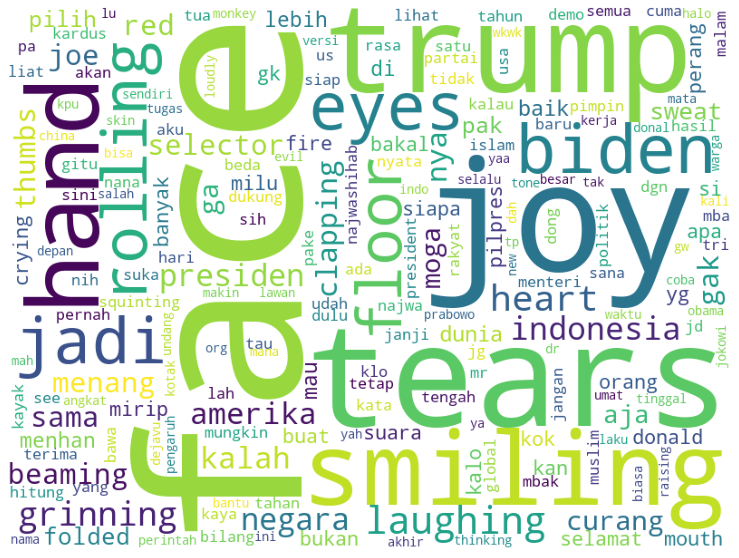

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height, collocations=False).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(df_processed['comments']))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


tvec = TfidfVectorizer()
dtc = DecisionTreeClassifier(max_depth=20, random_state=0)

model= Pipeline([('vectorizer',tvec)
                 ,('classifier',dtc)])

x = df_processed['comments']
y = df_processed['label_akhir']
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                     test_size = 0.2, 
                                                     random_state = 42)


In [ ]:
model.fit(x_train,y_train)
hasil = model.predict(x_test)
dataset = pd.DataFrame({'Real Values':y_test.values.reshape(-1), 
                        'Predicted Values':hasil.reshape(-1), 
                        'Comment':x_test.values.reshape(-1)})
dataset

,Real Values,Predicted Values,Comment
0,3,2,joe biden is not american president party biden komit fraud it is not done yet
1,1,2,alhamdulillah
2,2,2,egisugianto37 rolling on the floor laughing rolling on the floor laughing rolling on the floor laughing
3,2,2,udahlah trump jadi presiden miss universe aja ke era trump yang glamour beaming face with smiling eyes victory hand selector
4,2,2,p
...,...,...,...
440,2,2,sakaplwgn
441,1,1,selamat joebiden presiden as pilih periode 2020 2025 party popper
442,2,2,wajar kalo kalah protest bilang menang curang
443,2,2,therockskulls kelas teman bang dulu mungkin beaming face with smiling eyes


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

              precision    recall  f1-score   support

           1       0.68      0.50      0.57       109
           2       0.79      0.93      0.86       293
           3       0.38      0.19      0.25        43

    accuracy                           0.75       445
   macro avg       0.62      0.54      0.56       445
weighted avg       0.73      0.75      0.73       445

[[ 54  48   7]
 [ 14 273   6]
 [ 11  24   8]]


<Figure size 720x504 with 0 Axes>

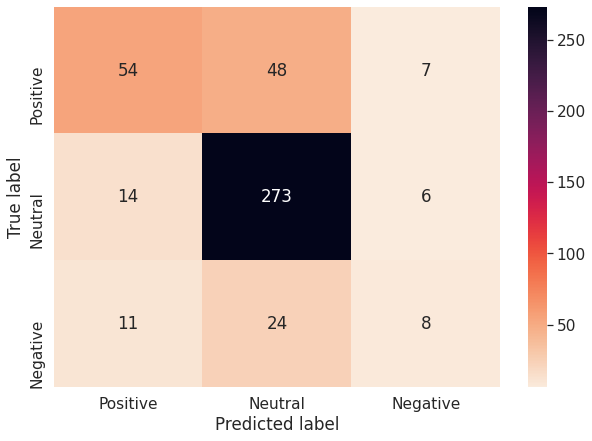

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

print(classification_report(y_test, hasil))
print(confusion_matrix(y_test, hasil))
cmap = sns.cm.rocket_r

plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
categories = ['Positive', 'Neutral', 'Negative'] 
# sn.heatmap(confusion_matrix(y_test, hasil), annot=True, fmt='g', annot_kws={"size": 12}, cmap = cmap)
make_confusion_matrix(confusion_matrix(y_test, hasil),
                      categories=categories,
                      cmap=cmap, sum_stats=False, figsize=(10,7), percent=False)